# Dependencies and files

## Imports

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as an

# Global variables

## Load files

### Load pseudobulks

In [2]:
adata_pb = sc.read_h5ad('results/pb_mean_supercluster.h5ad')
# adata_pb.var.index.name = 'ensembl_id'
# adata_pb.var.reset_index(inplace=True)
# adata_pb.var.set_index('feature_name', inplace=True)
adata_pb

AnnData object with n_obs × n_vars = 322 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'supercluster_term', 'tissue_ontology_term_id', 'tissue_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [4]:
adata_pb.obs.supercluster_term.value_counts()

supercluster_term
LAMP5-LHX6 and Chandelier              20
MGE interneuron                        20
CGE interneuron                        20
Upper-layer intratelencephalic         20
Deep-layer corticothalamic and 6b      20
Deep-layer intratelencephalic          20
Oligodendrocyte precursor              20
Oligodendrocyte                        20
Miscellaneous                          20
Microglia                              20
Astrocyte                              20
Vascular                               19
Deep-layer near-projecting             19
Splatter                               18
Committed oligodendrocyte precursor    16
Fibroblast                             14
Eccentric medium spiny neuron           8
Amygdala excitatory                     5
Hippocampal CA1-3                       2
Medium spiny neuron                     1
Name: count, dtype: int64

In [5]:
adata_pb.obs.psbulk_n_cells = adata_pb.obs.psbulk_n_cells.astype(float)
adata_pb.obs[['supercluster_term', 'psbulk_n_cells']].groupby(['supercluster_term']).sum()

C:\Users\claptar\AppData\Local\Temp\ipykernel_7104\2755650290.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pb.obs[['supercluster_term', 'psbulk_n_cells']].groupby(['supercluster_term']).sum()


psbulk_n_cells
supercluster_term                                  
Amygdala excitatory                            34.0
Astrocyte                                    3067.0
CGE interneuron                             14246.0
Committed oligodendrocyte precursor            50.0
Deep-layer corticothalamic and 6b            5070.0
Deep-layer intratelencephalic               15780.0
Deep-layer near-projecting                   1702.0
Eccentric medium spiny neuron                  12.0
Fibroblast                                     52.0
Hippocampal CA1-3                               2.0
LAMP5-LHX6 and Chandelier                    2170.0
MGE interneuron                             17169.0
Medium spiny neuron                             1.0
Microglia                                    1074.0
Miscellaneous                                1681.0
Oligodendrocyte                              3707.0
Oligodendrocyte precursor                    1704.0
Splatter                                      156.0
Upper-layer intratelencephalic              34644.0
Vascular                                       61.0

In [6]:
adata_pb = adata_pb[adata_pb.obs.psbulk_n_cells > 100]
adata_pb

View of AnnData object with n_obs × n_vars = 151 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'supercluster_term', 'tissue_ontology_term_id', 'tissue_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [8]:
adata_pb.obs.supercluster_term.value_counts()

supercluster_term
Upper-layer intratelencephalic       20
CGE interneuron                      19
MGE interneuron                      19
Deep-layer intratelencephalic        18
Deep-layer corticothalamic and 6b    16
Astrocyte                            13
LAMP5-LHX6 and Chandelier            12
Oligodendrocyte                      12
Deep-layer near-projecting            6
Microglia                             6
Oligodendrocyte precursor             6
Miscellaneous                         4
Name: count, dtype: int64

In [9]:
adata_pb.obs[['supercluster_term', 'psbulk_n_cells']].groupby(['supercluster_term']).sum()

C:\Users\claptar\AppData\Local\Temp\ipykernel_7104\2462577169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pb.obs[['supercluster_term', 'psbulk_n_cells']].groupby(['supercluster_term']).sum()


psbulk_n_cells
supercluster_term                                
Astrocyte                                  2737.0
CGE interneuron                           14170.0
Deep-layer corticothalamic and 6b          4988.0
Deep-layer intratelencephalic             15678.0
Deep-layer near-projecting                  946.0
LAMP5-LHX6 and Chandelier                  1712.0
MGE interneuron                           17111.0
Microglia                                   671.0
Miscellaneous                              1247.0
Oligodendrocyte                            3316.0
Oligodendrocyte precursor                   872.0
Upper-layer intratelencephalic            34644.0

In [10]:
adata_pb.obs.roi.value_counts()

roi
Human A24    56
Human A46    44
Human A32    31
Human A14    19
Human A23     1
Name: count, dtype: int64

In [11]:
adata_pb = adata_pb[adata_pb.obs.roi != 'Human A23']
adata_pb

View of AnnData object with n_obs × n_vars = 150 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'supercluster_term', 'tissue_ontology_term_id', 'tissue_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [12]:
expression = pd.DataFrame(adata_pb.X, index=adata_pb.obs_names, columns=adata_pb.var_names)
expression.T.to_csv('results/supercluster_expression.csv')
adata_pb.obs.to_csv('results/supercluster_annotation.csv')

## Load snRNA-Seq

In [15]:
adata_sc = sc.read_h5ad('results/hb_umap.h5ad')
adata_sc
# adata_sc.var.index.name = 'ensembl_id'
# adata_sc.var.reset_index(inplace=True)
# adata_sc.var.set_index('feature_name', inplace=True)
# adata_sc

AnnData object with n_obs × n_vars = 102382 × 19346
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', '

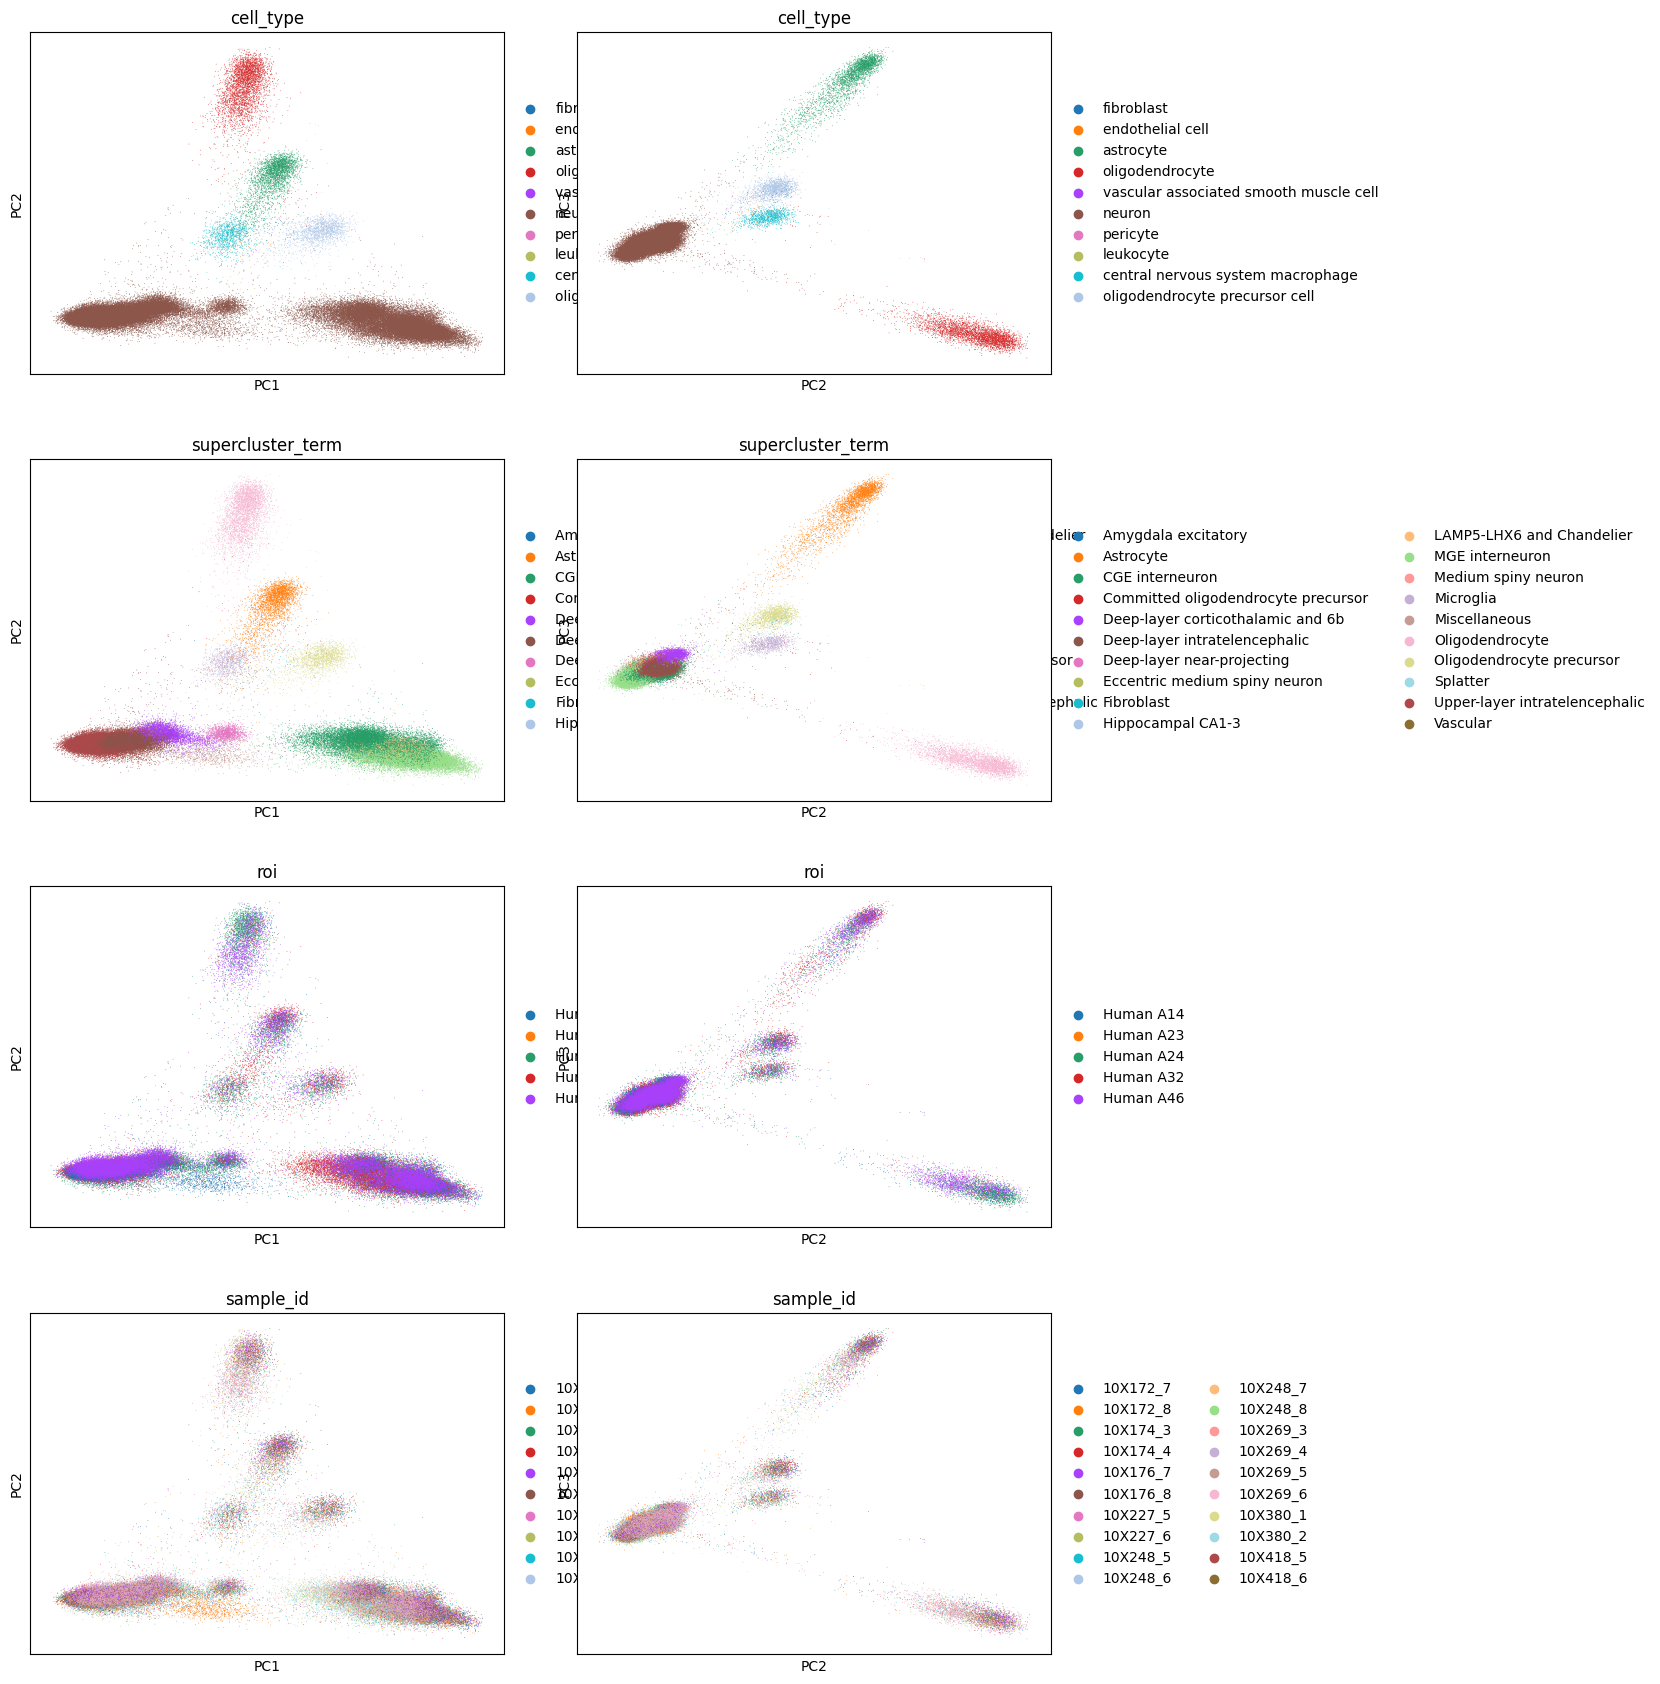

In [20]:
sc.pl.pca(adata_sc, color=['cell_type', 'supercluster_term', 'roi', 'sample_id'], components=['1,2', '2,3'], ncols=2, wspace=0.05)

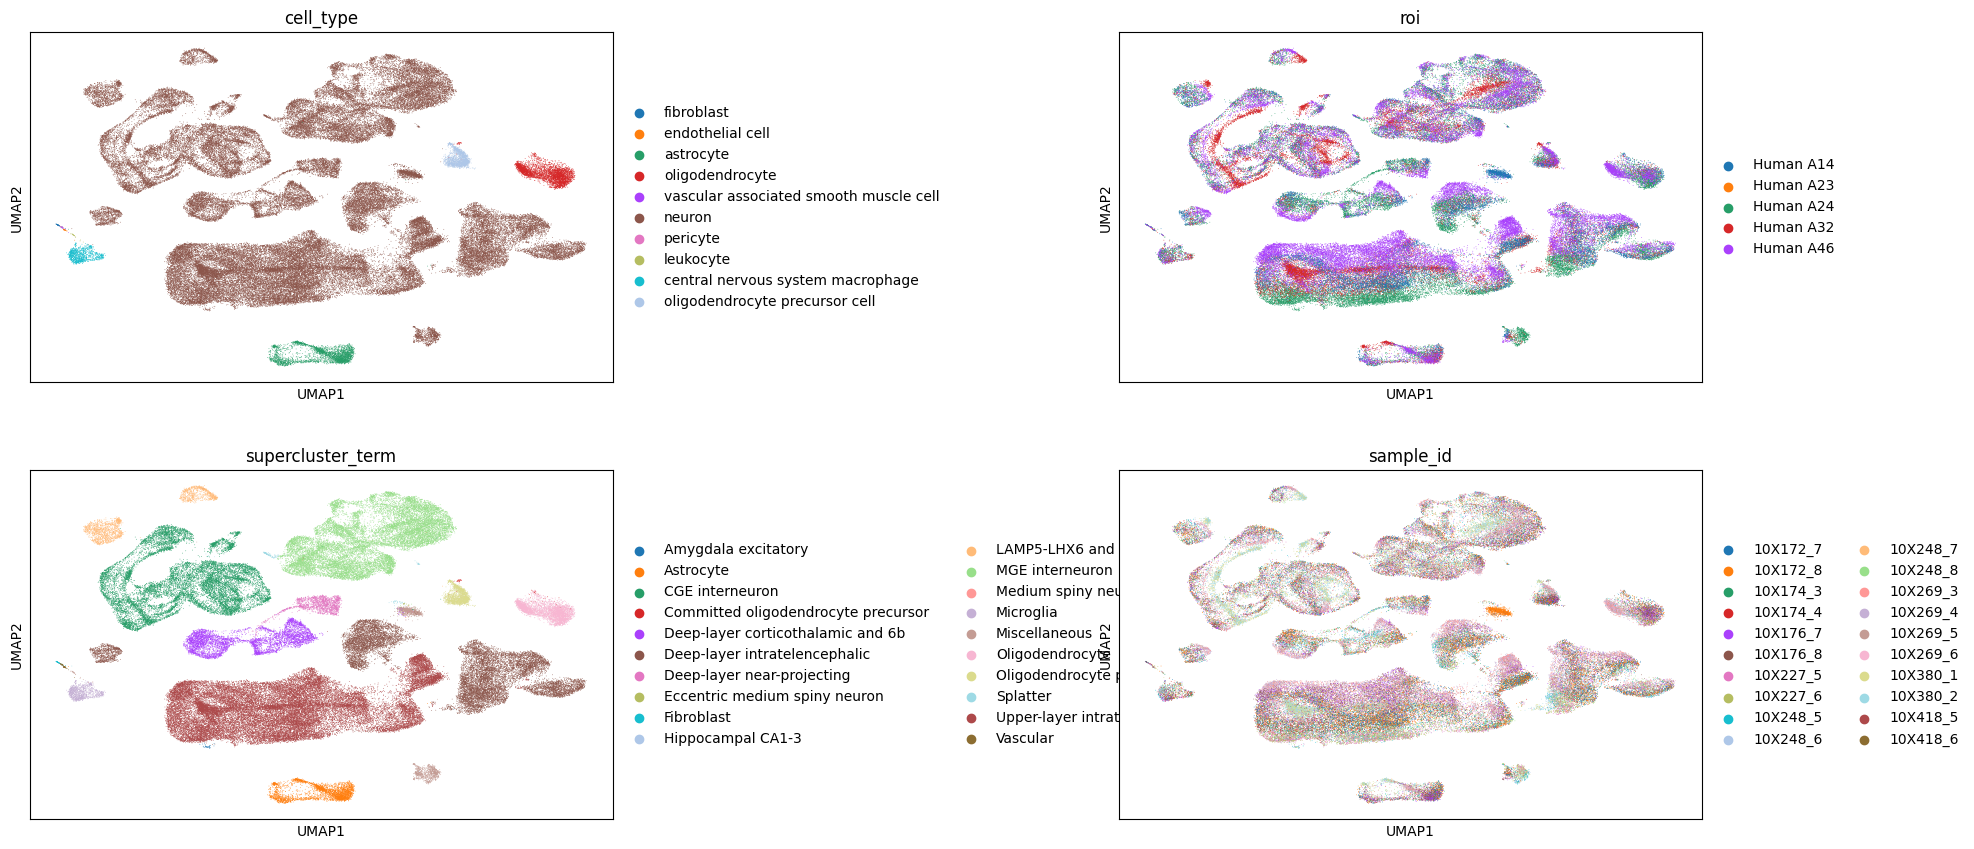

In [21]:
sc.pl.umap(adata_sc, color=['cell_type', 'roi', 'supercluster_term', 'sample_id'], ncols=2, wspace=0.7)

# Preprocess

## Filter

In [22]:
sc.pp.filter_genes(adata_pb, min_counts=5)
sc.pp.filter_genes(adata_pb, min_cells=10)

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\preprocessing\_simple.py:273: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_counts"] = number


In [23]:
adata_pb

AnnData object with n_obs × n_vars = 150 × 13439
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'supercluster_term', 'tissue_ontology_term_id', 'tissue_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'n_counts', 'n_cells'
    layers: 'psbulk_props'

## Normalize

In [24]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

Highly variable genes: 3513


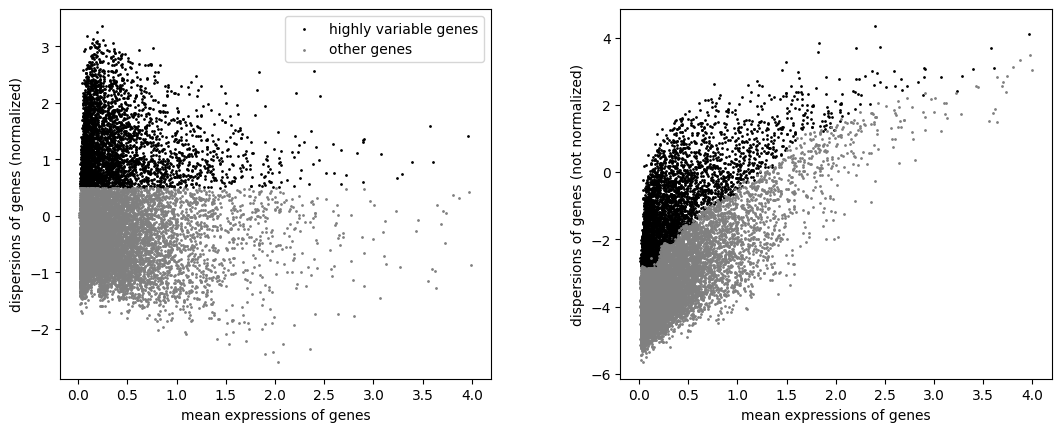

In [25]:
sc.pp.highly_variable_genes(adata_pb, batch_key='roi', max_mean=5)
print("Highly variable genes: %d"%sum(adata_pb.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata_pb)

## Visualize

In [26]:
sc.tl.pca(adata_pb)

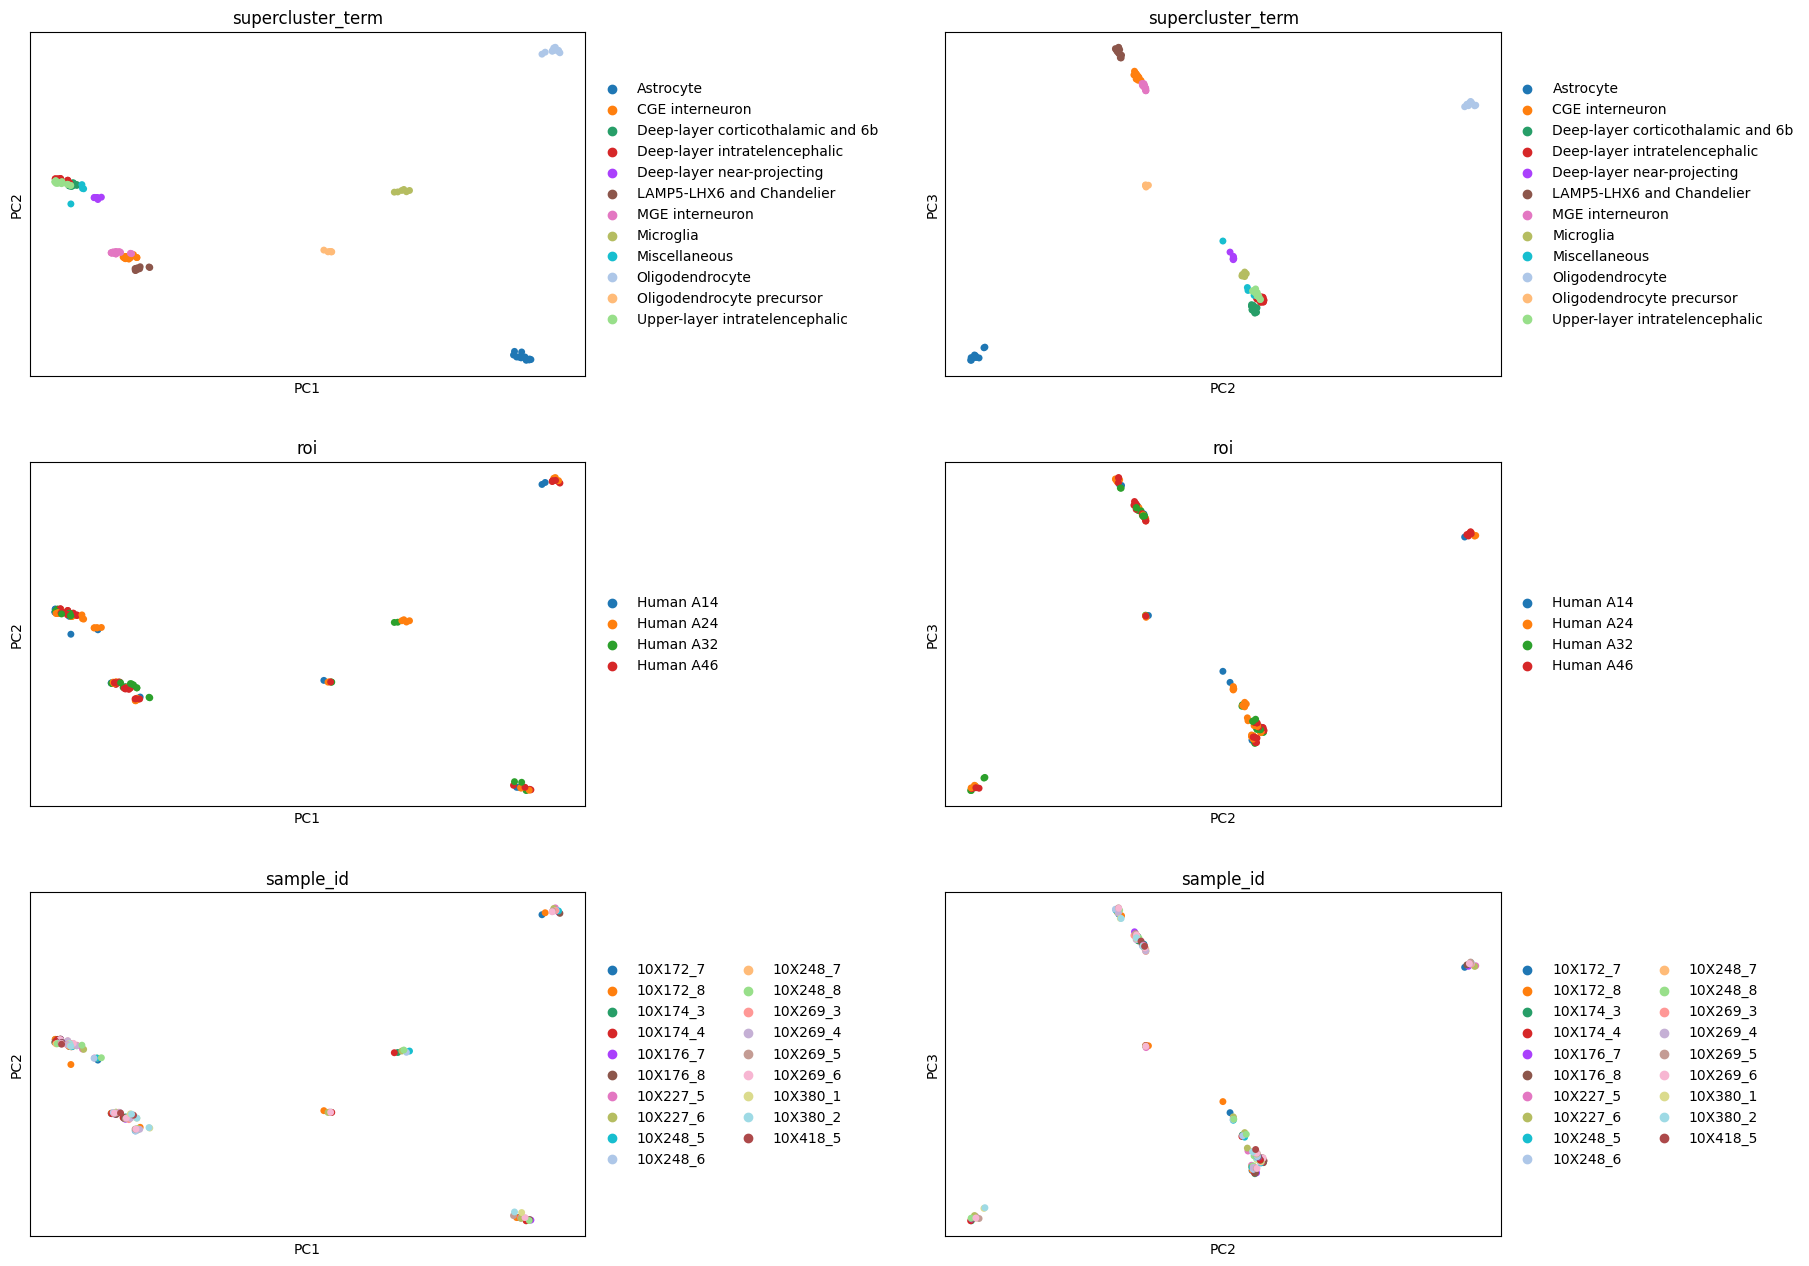

In [28]:
sc.pl.pca(adata_pb, color=['supercluster_term', 'roi', 'sample_id'], size=100, components=['1,2', '2,3'], ncols=2, wspace=0.5)

In [29]:
sc.pp.neighbors(adata_pb)
sc.tl.umap(adata_pb)

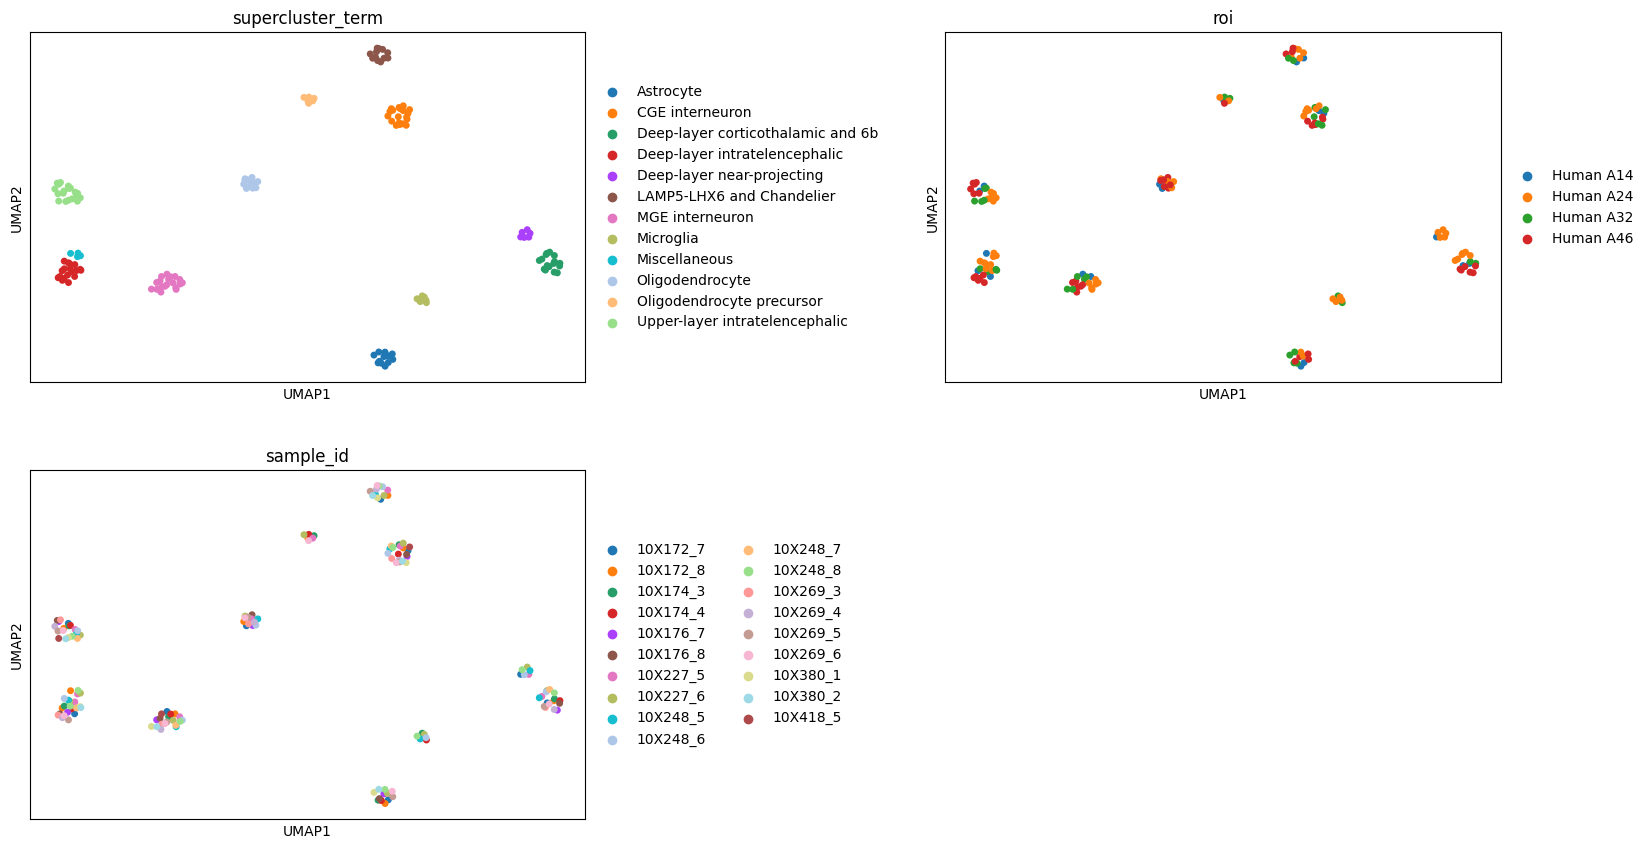

In [30]:
sc.pl.umap(adata_pb, color=['supercluster_term', 'roi', 'sample_id'], size=100, ncols=2, wspace=0.5)

# Rank genes

## T-test

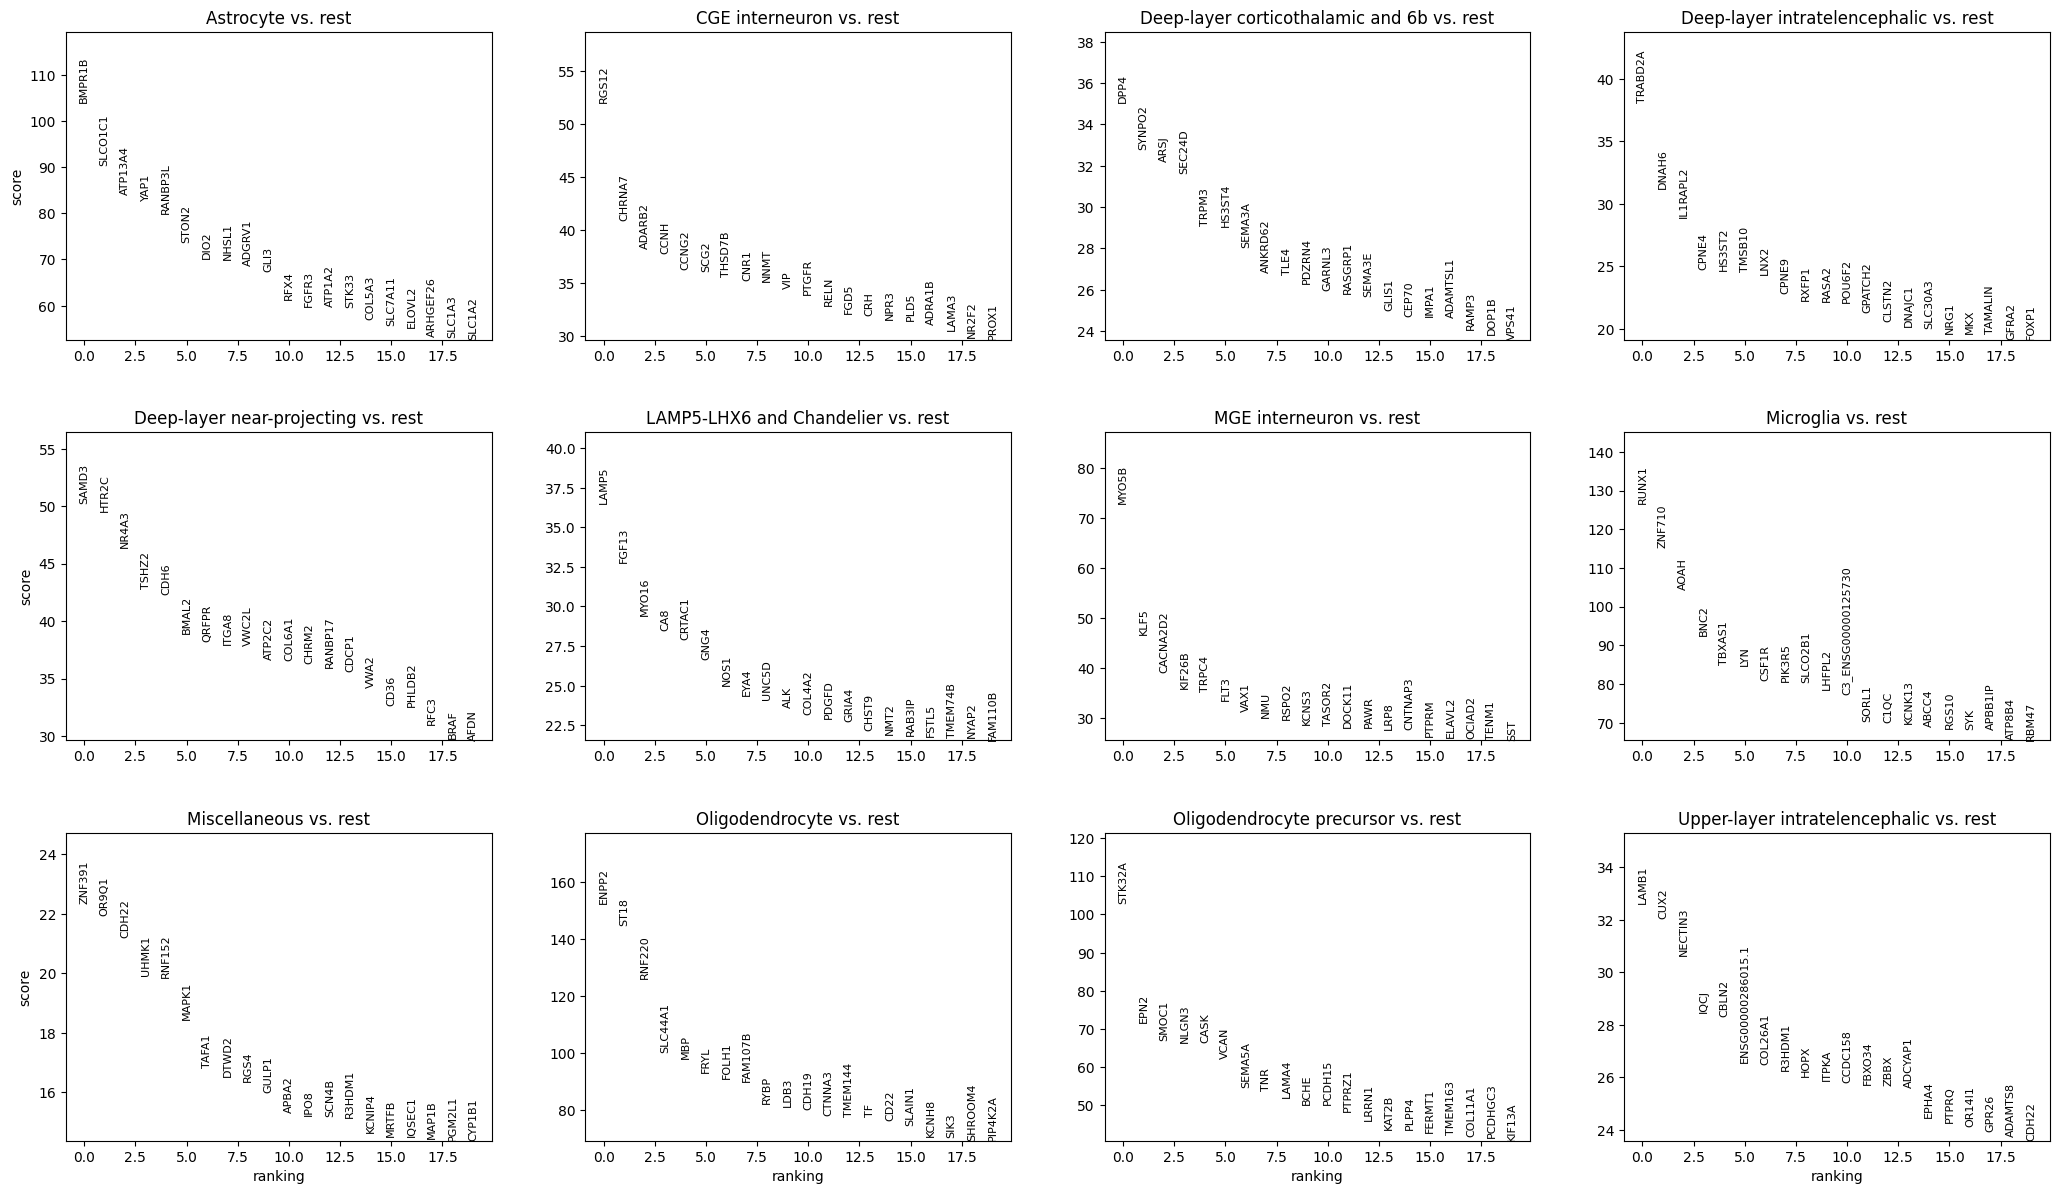

In [32]:
sc.tl.rank_genes_groups(adata_pb, 'supercluster_term', method='t-test', reference='rest', key_added="t-test", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="t-test")

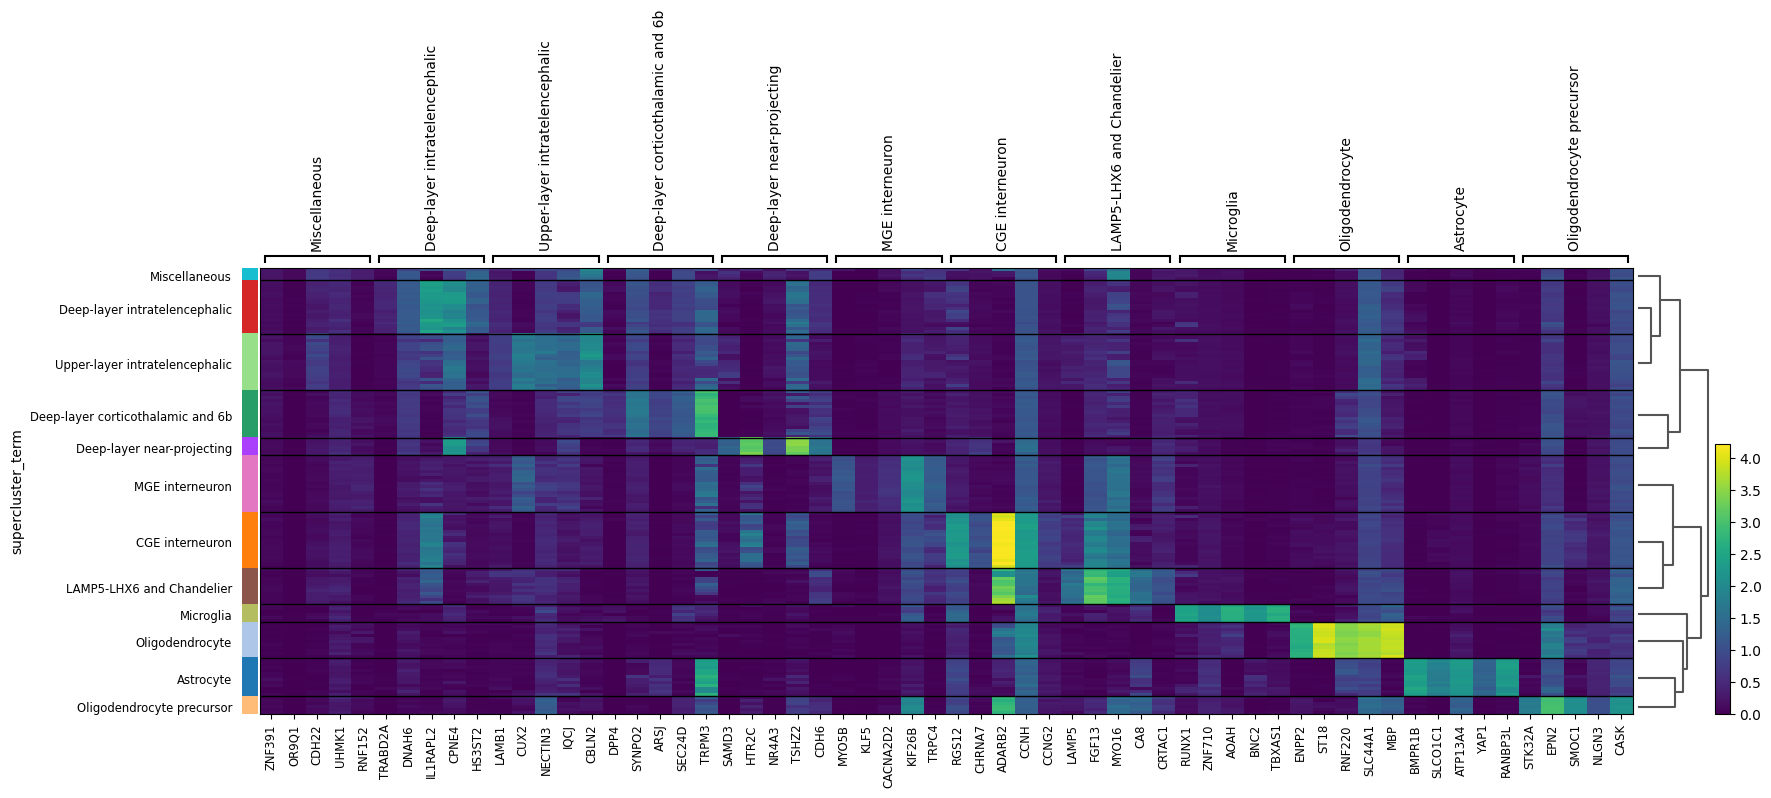

In [33]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="t-test", groupby="supercluster_term", show_gene_labels=True)

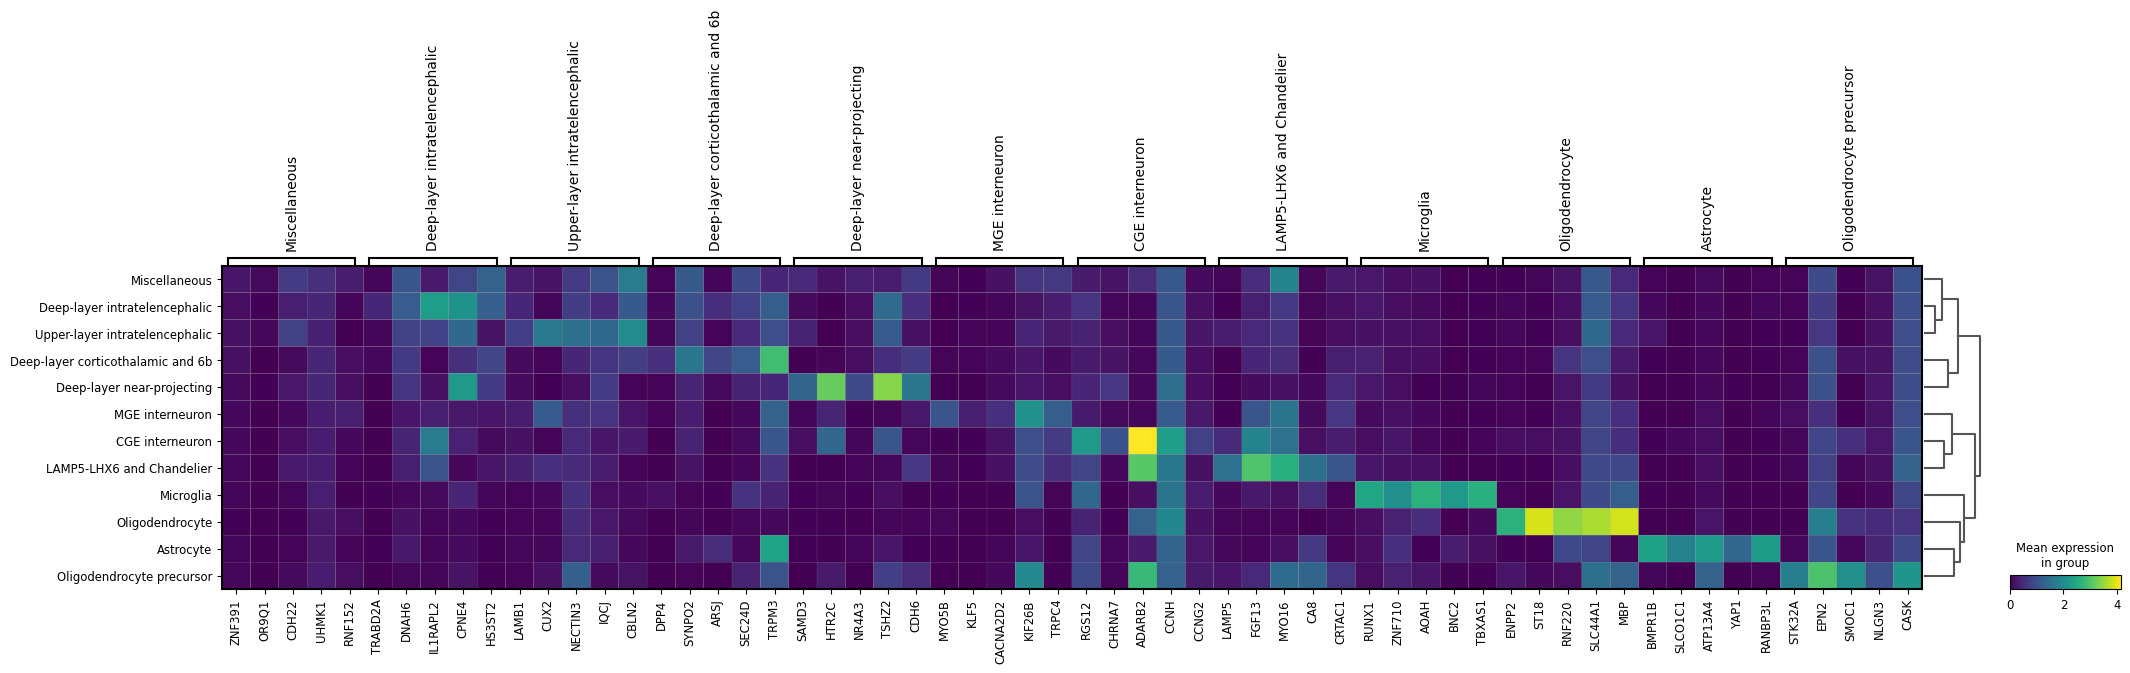

In [34]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="supercluster_term")

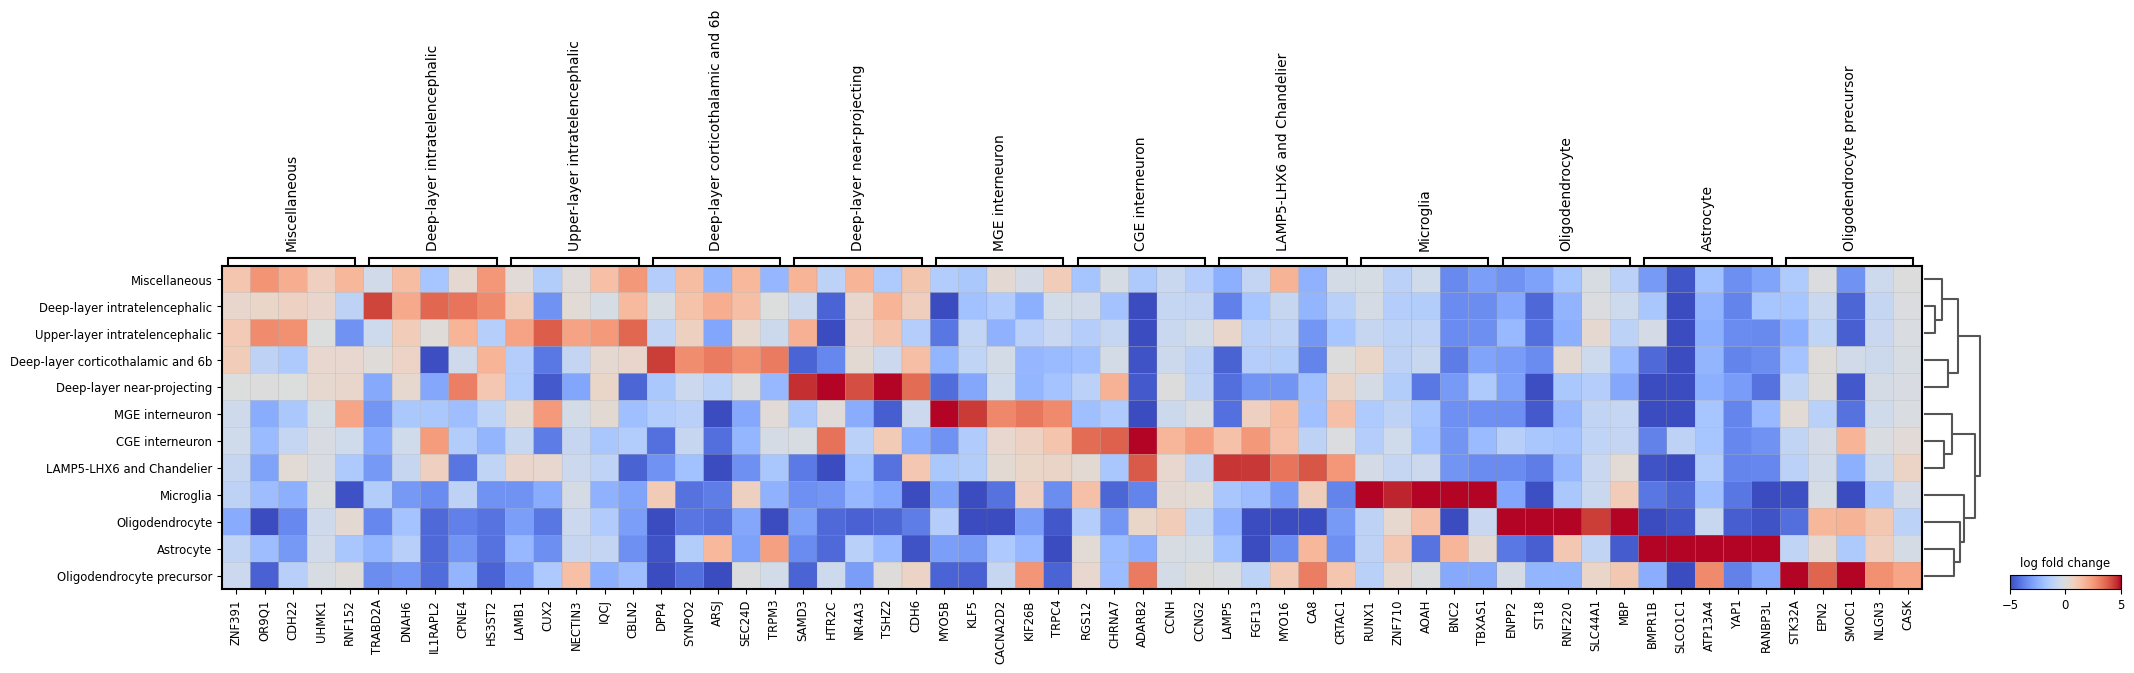

In [36]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="supercluster_term", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Wilcoxon

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\plotting\_tools\__init__.py:432: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


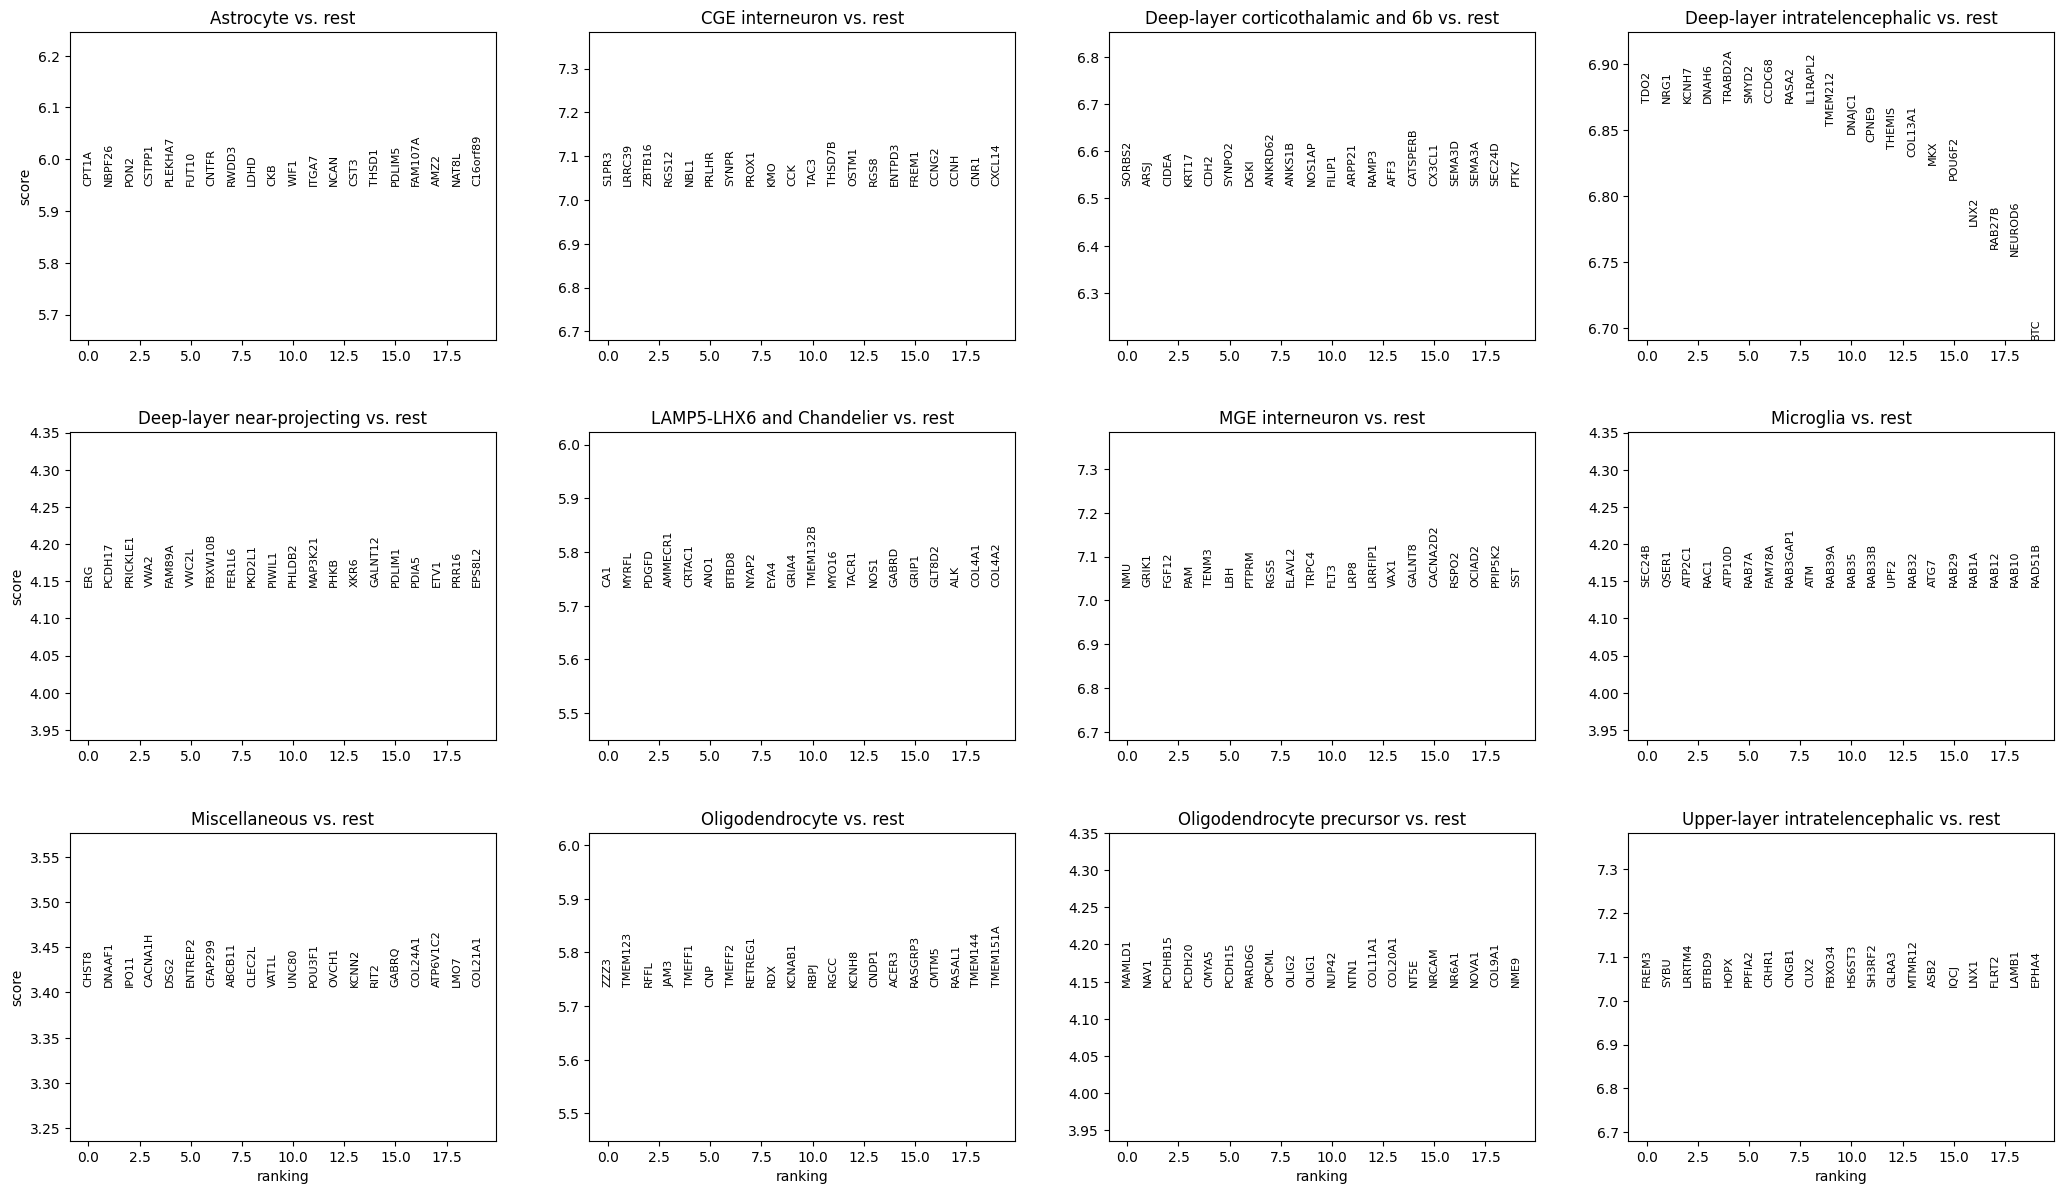

In [37]:
sc.tl.rank_genes_groups(adata_pb, 'supercluster_term', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

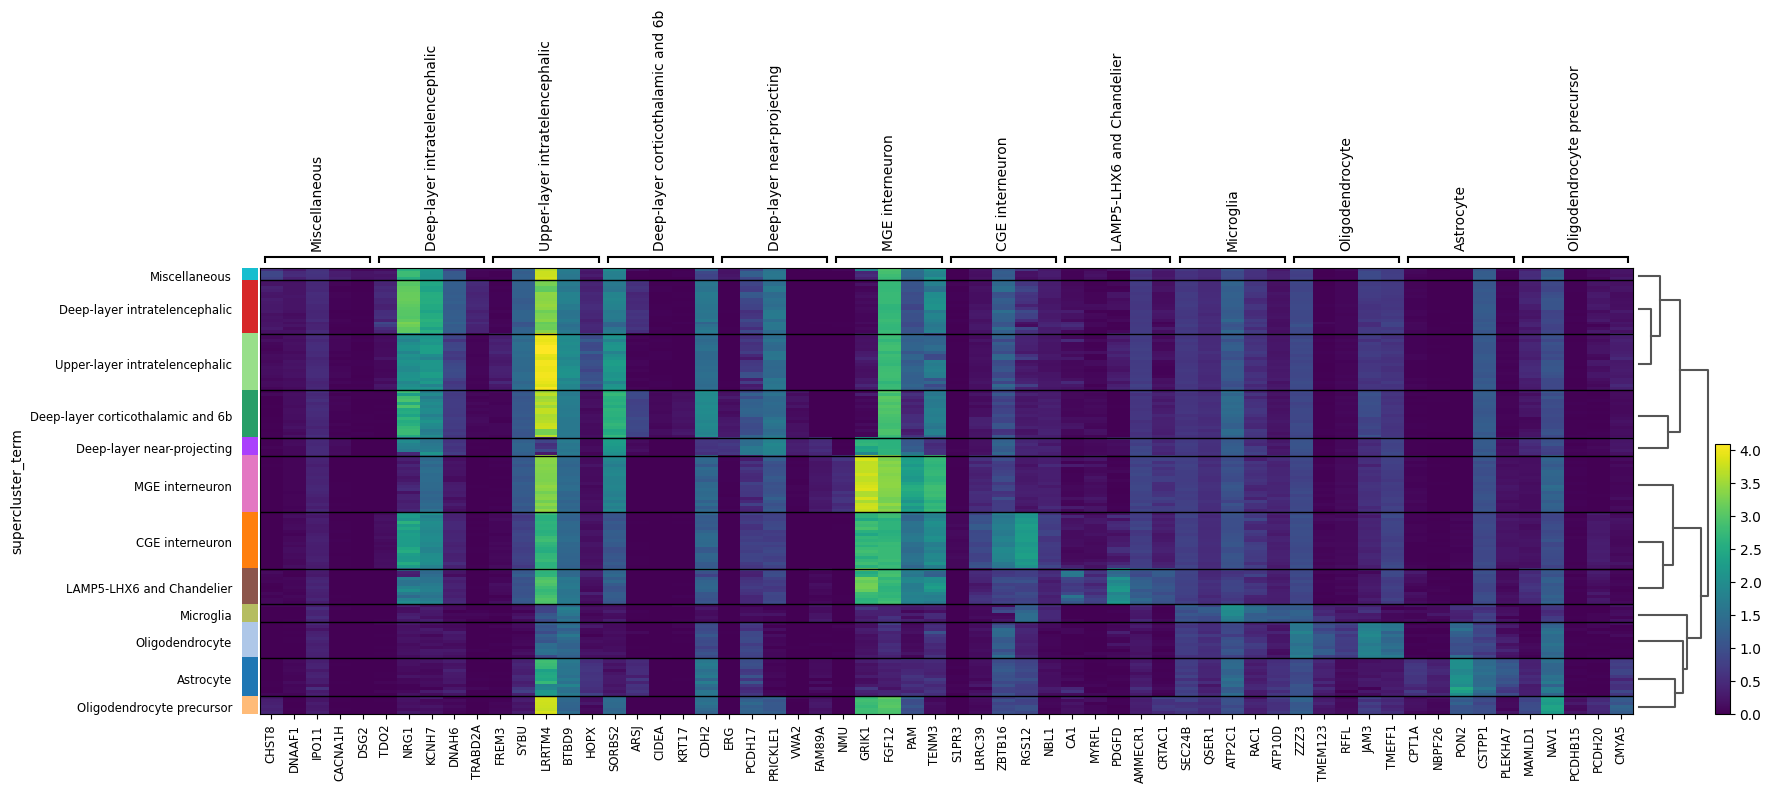

In [40]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="supercluster_term", show_gene_labels=True)

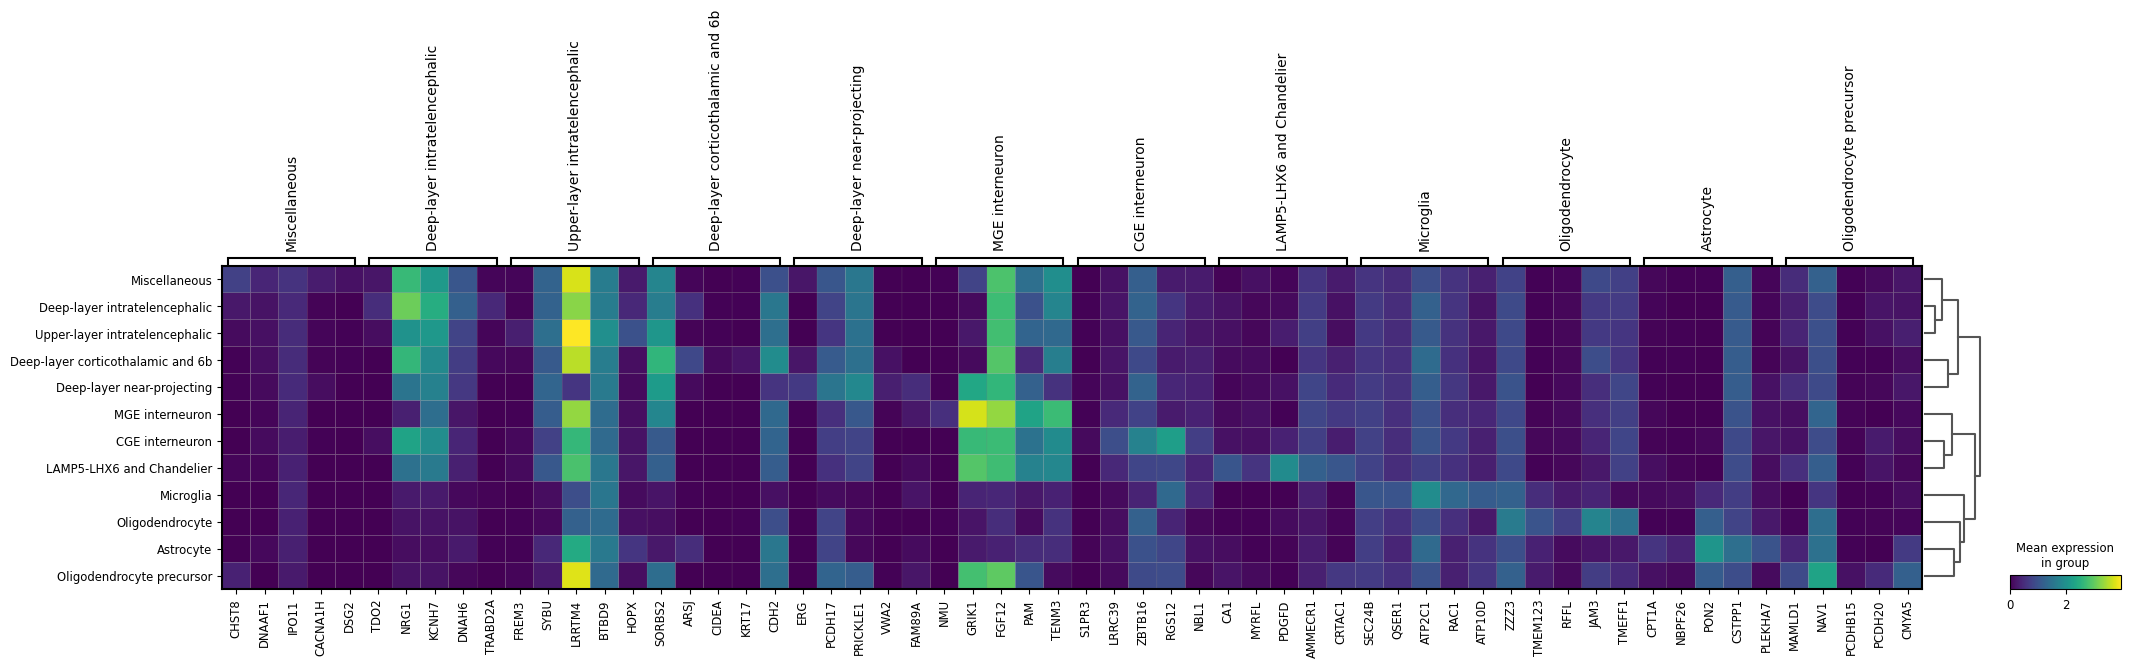

In [41]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="supercluster_term")

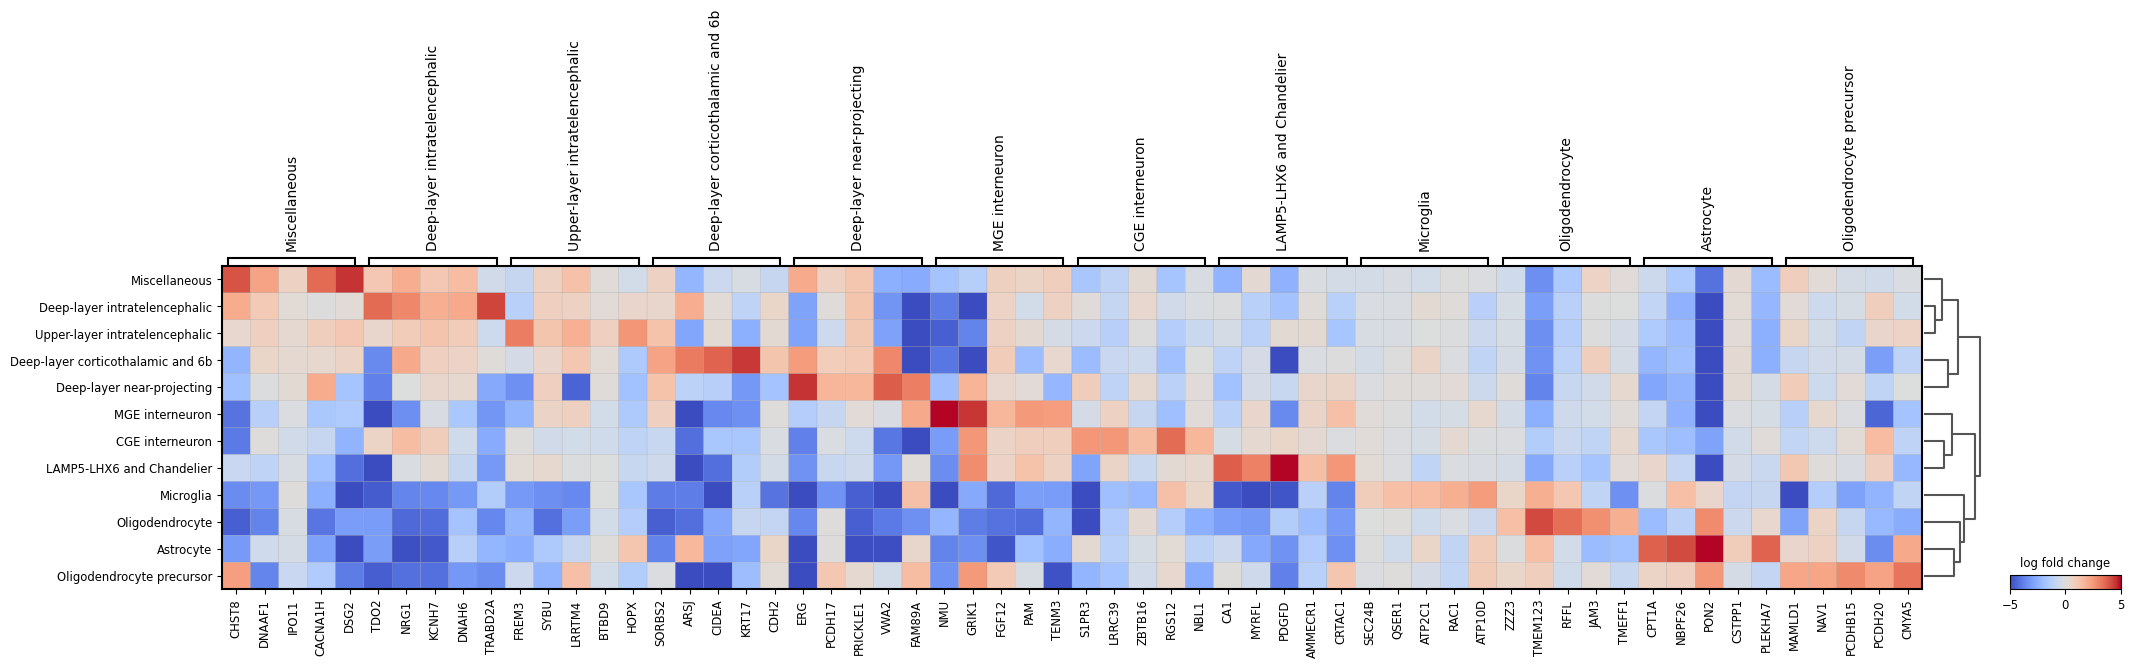

In [42]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="supercluster_term", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Logreg

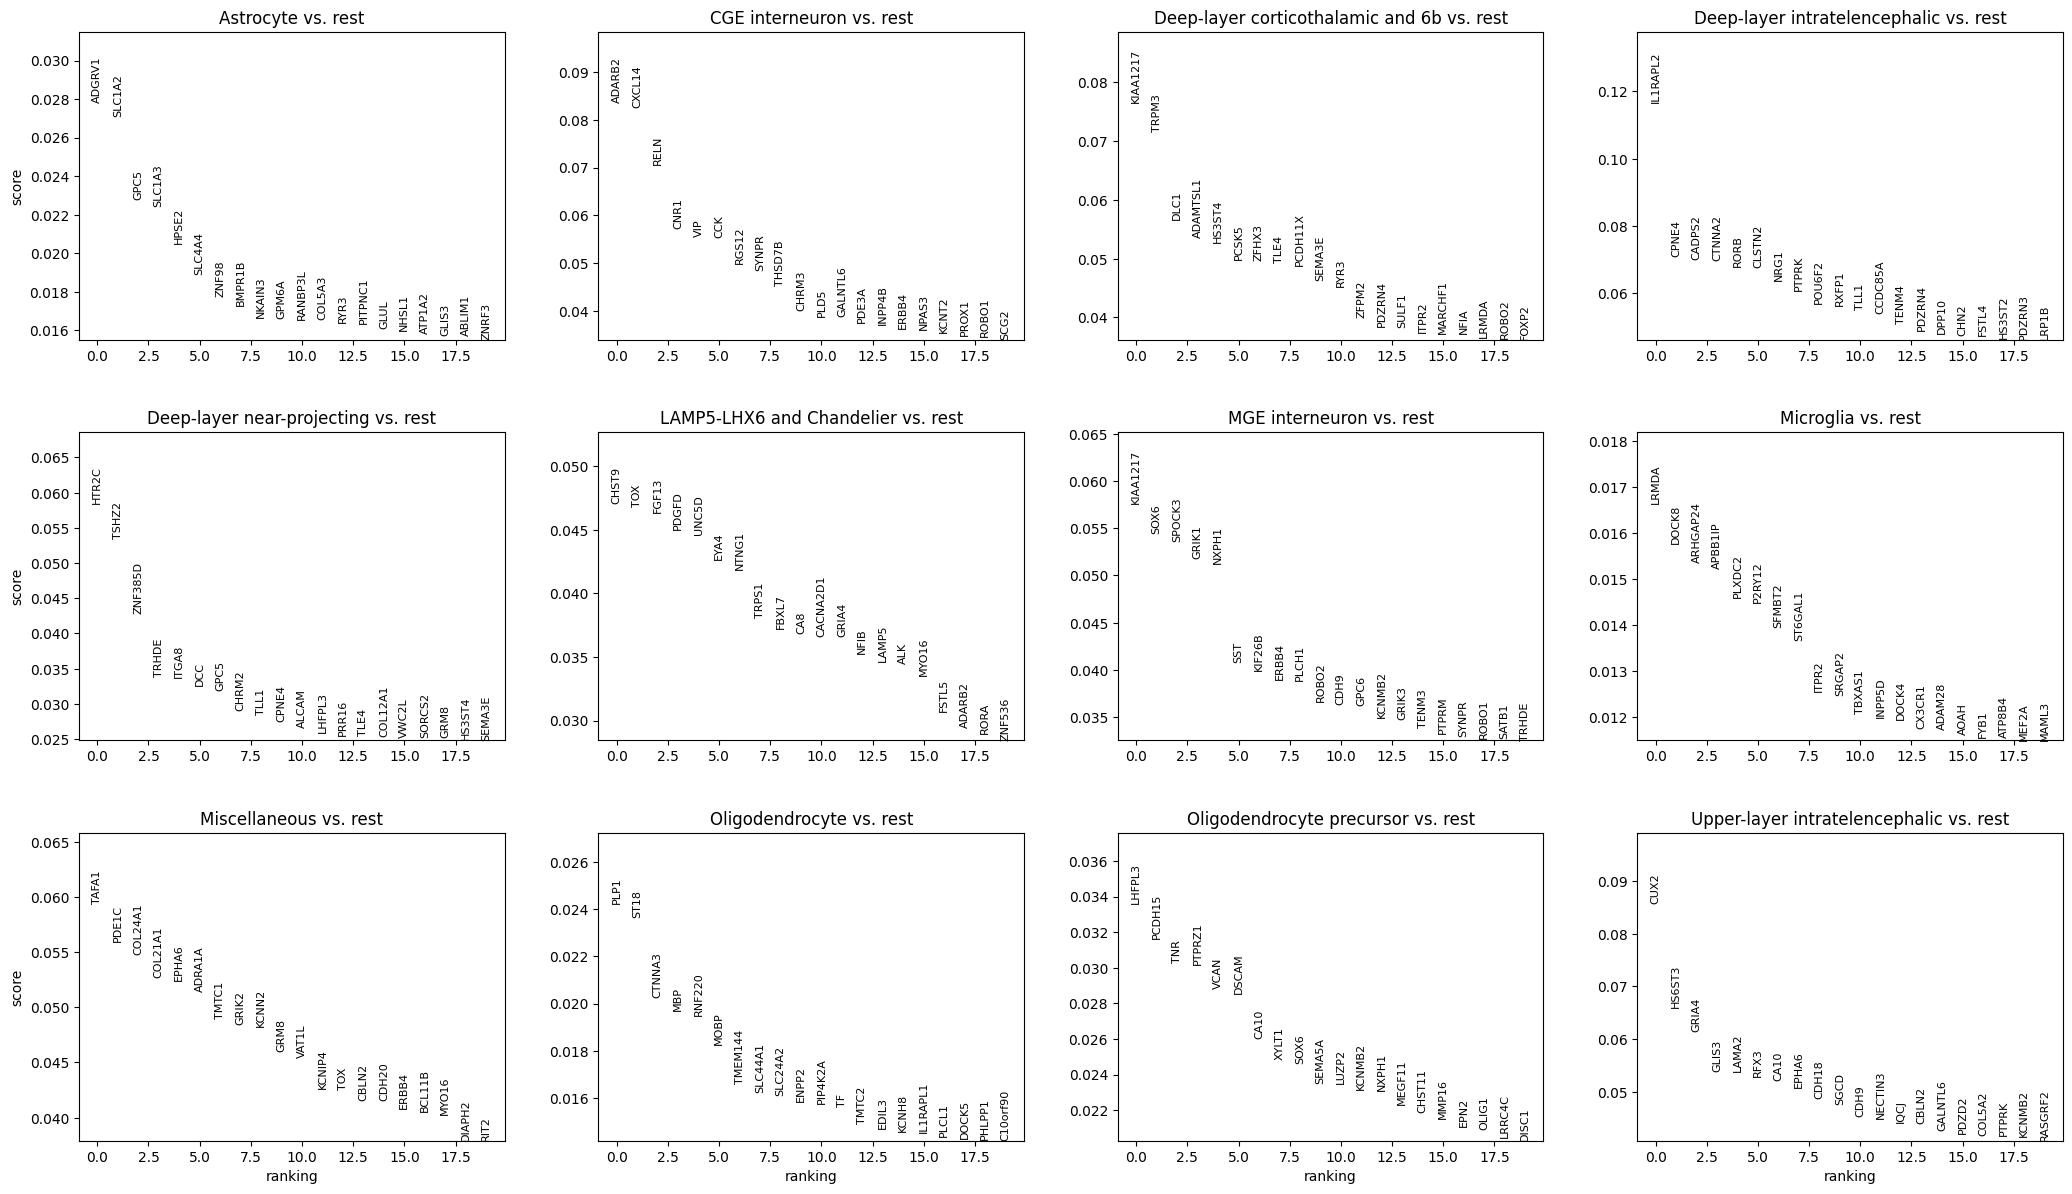

In [43]:
sc.tl.rank_genes_groups(adata_pb, 'supercluster_term', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

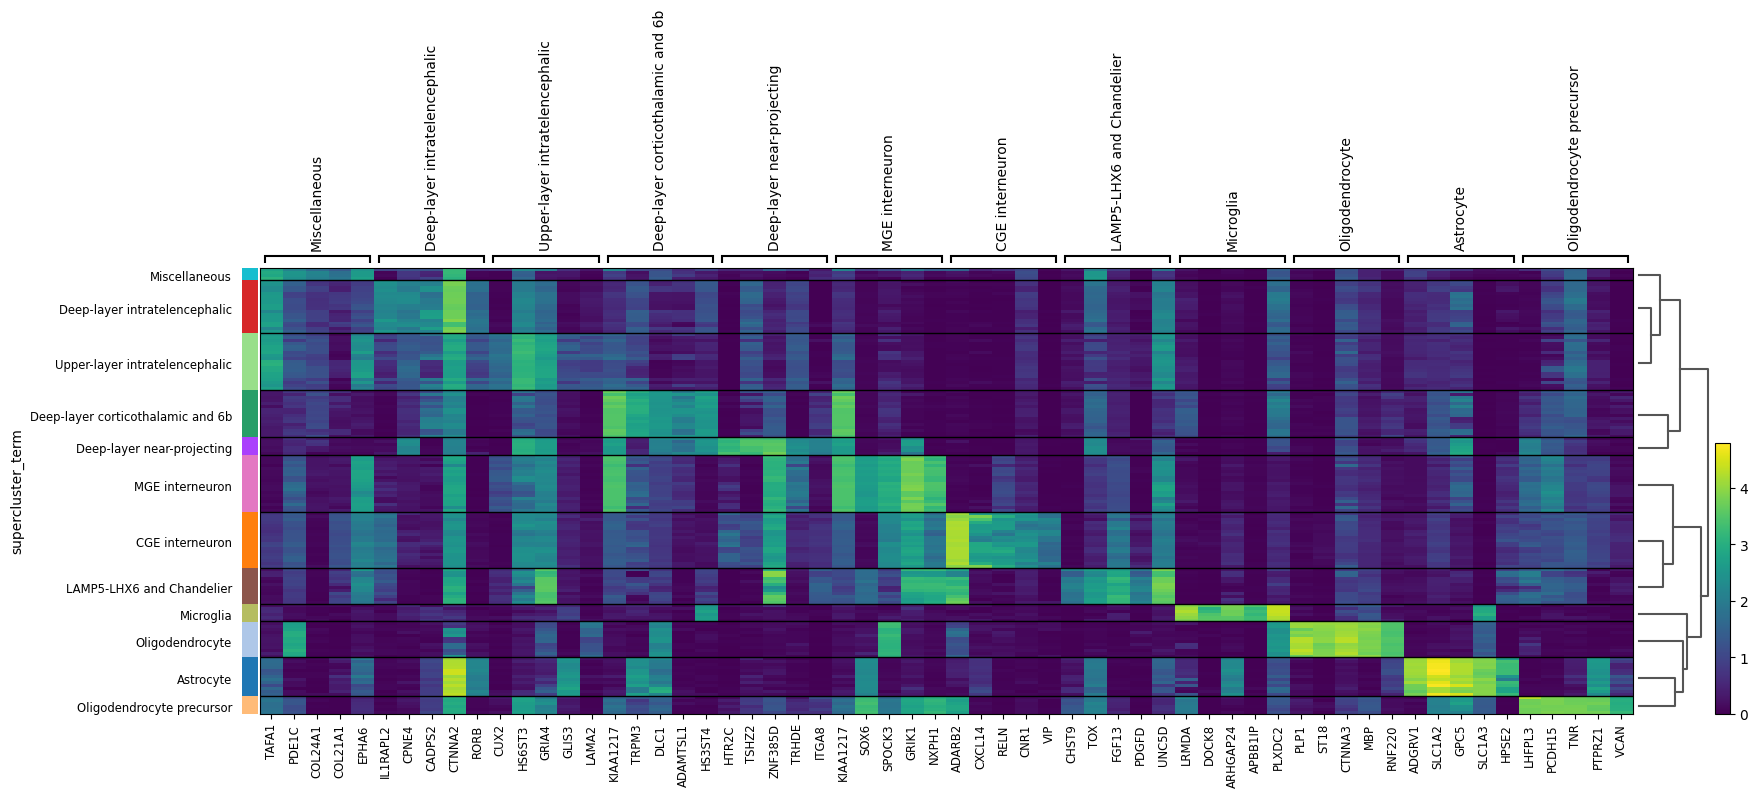

In [44]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="supercluster_term", show_gene_labels=True)

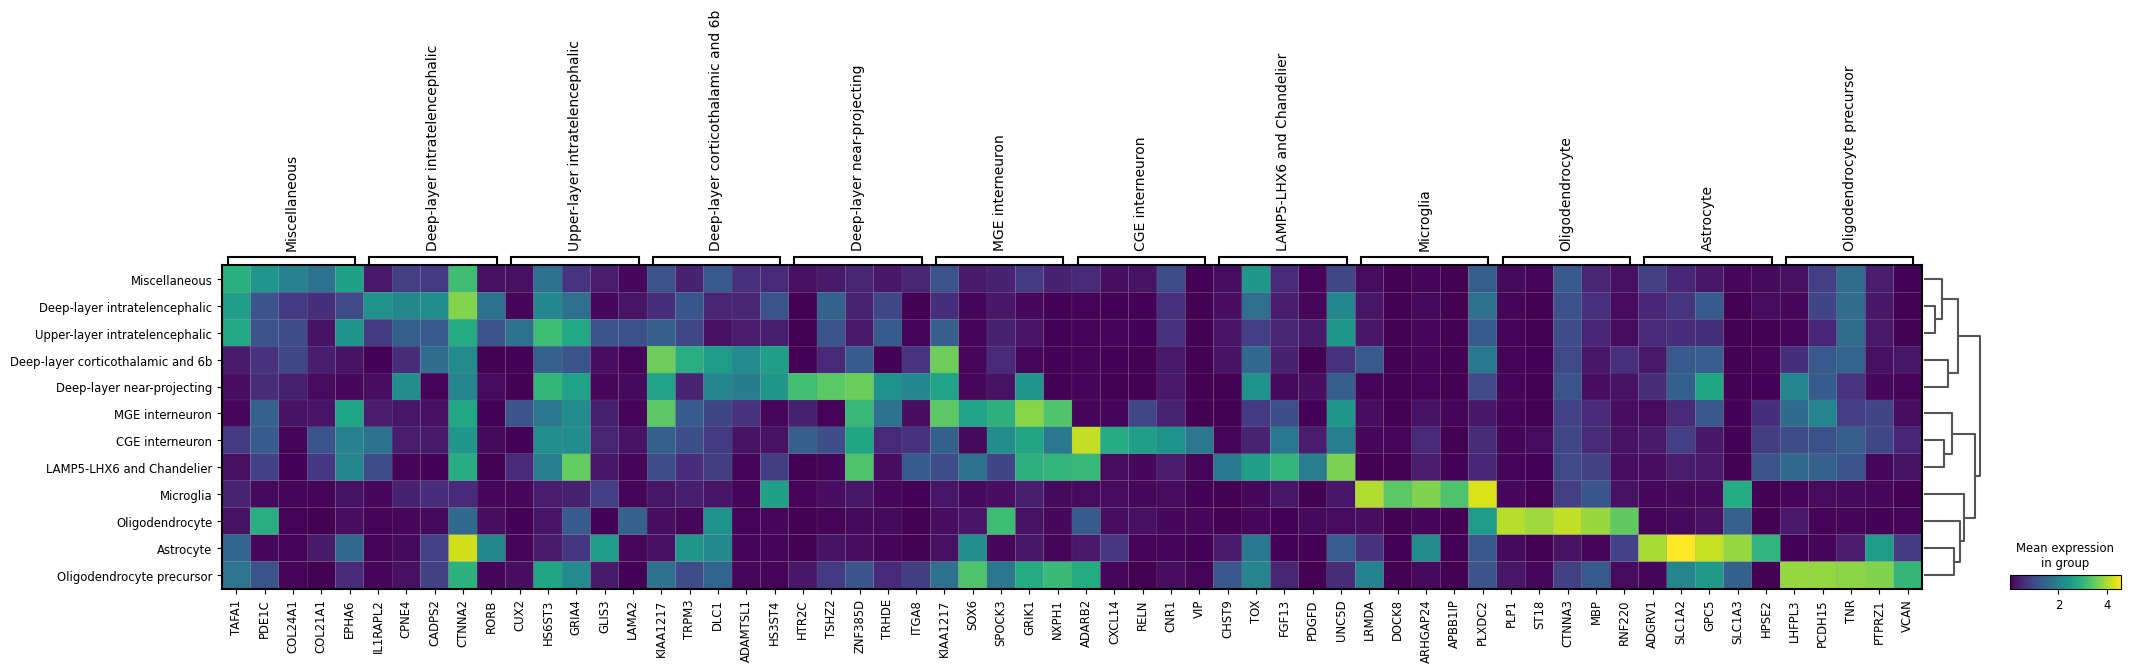

In [45]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="supercluster_term")

### Save results

In [46]:
adata_pb.write_h5ad("results/pb_adata_diffexpr_supercluster.h5ad")